# **Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando a base de dados  

dados = pd.read_csv('market.csv')
dados

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
shape = dados.shape
print(f'O dataset possui {shape[0]} linhas e {shape[1]} colunas')

O dataset possui 1000 linhas e 17 colunas


# **Limpeza de Dados**

In [4]:
# Informações sobre a base de dados 

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
#Verificando a existencia de valores ausentes na base de dados

dados.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

##### Como não há valores ausentes, é possível prosseguir para as próximas etapas da análise.

In [6]:
## Verificando dados do conjunto 

round( dados.describe(), 3)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,55.672,5.510,15.379,322.967,307.587,4.762,15.379,6.973
std,26.495,2.923,11.709,245.885,234.177,0.000,11.709,1.719
min,10.080,1.000,0.508,10.678,10.170,4.762,0.508,4.000
25%,32.875,3.000,5.925,124.422,118.498,4.762,5.925,5.500
50%,55.230,5.000,12.088,253.848,241.760,4.762,12.088,7.000
75%,77.935,8.000,22.445,471.350,448.905,4.762,22.445,8.500
max,99.960,10.000,49.650,1042.650,993.000,4.762,49.650,10.000


### Primeiras Visualizações para verificar diferentes aspectos das vendas do supermercado

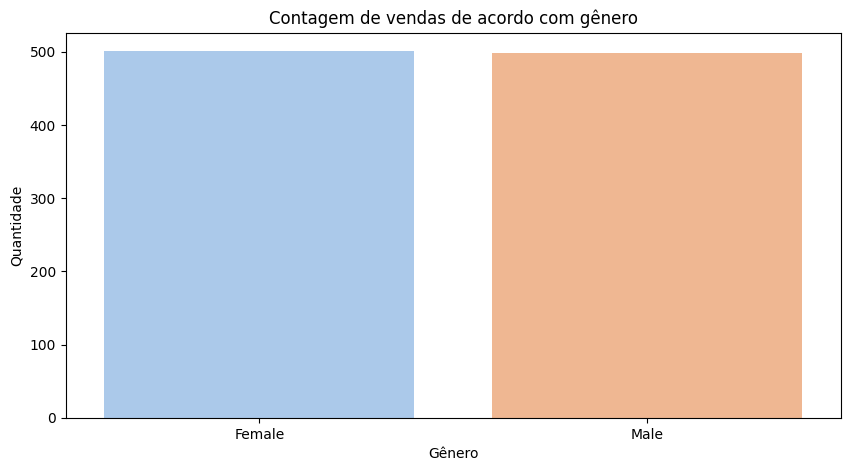

In [7]:
## Contagem de vendas de acordo com gênero

plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=dados, palette='pastel')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Contagem de vendas de acordo com gênero')
plt.show()

In [8]:
# Verificando o total de vendas entre Mulheres e Homens 

dados.groupby(['Gender']).agg({'Total': 'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


In [9]:
fm_count= dados['Gender'].value_counts()
fm_count

Female    501
Male      499
Name: Gender, dtype: int64

##### É possível observar, a partir da análise do gráfico e da contagem de clientes por gênero, que as mulheres tendem a gastar mais no total consolidado das três filiais. Entretanto como obervado que na contagem possui um leve desbanleceamento entre os dois gêneros, isso pode justificar o gasto entre as mulheres ser maior.

## Tipo de Cliente

Text(0, 0.5, 'Quantidade')

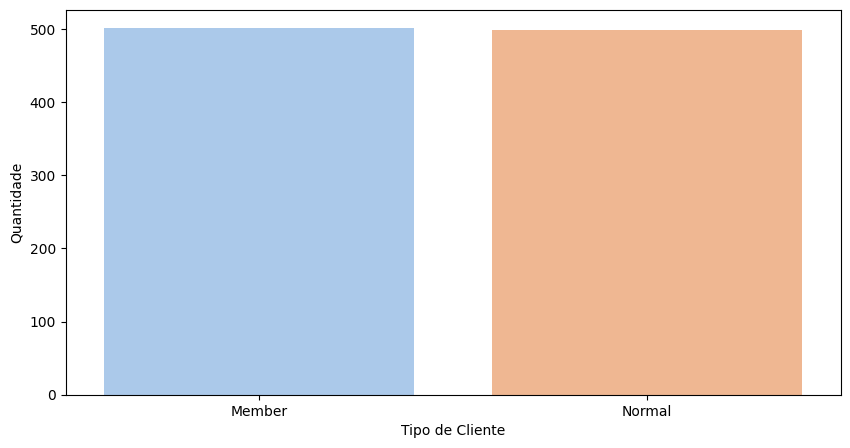

In [10]:
# Gráfico com os tipos de clientes presentes na base 

plt.figure(figsize=(10,5))
sns.countplot(x='Customer type', data=dados, palette='pastel')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Quantidade')

In [11]:
#Validando os dados numéricos

dados.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


#### A partir da análise do gráfico e da contagem do total gasto por tipo de cliente, é possível observar que não há uma diferença significativa entre o total gasto por clientes membros das filiais e clientes normais. Esse resultado pode ser justificado pela quantidade quase equilibrada entre os dois grupos.

Text(0.5, 1.0, 'Quantidade de clientes por filial')

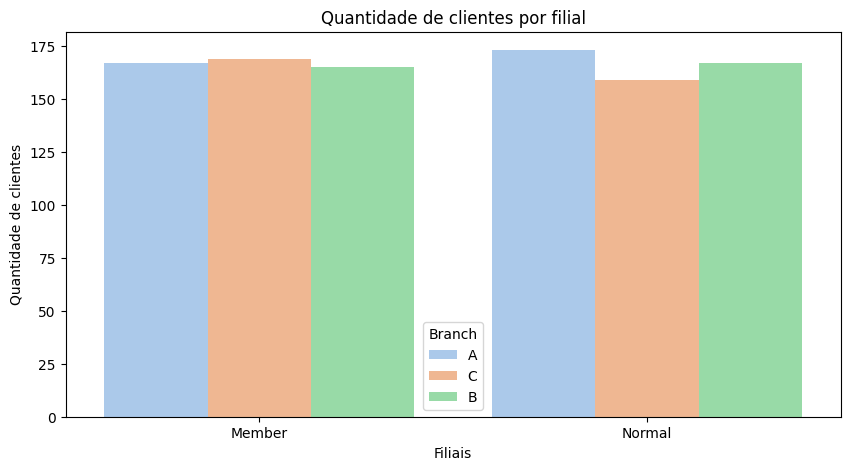

In [12]:
#Verificando a quantidade de clientes por filiais dos supermercados 

plt.figure(figsize=(10,5))
sns.countplot(x='Customer type', hue = 'Branch', data=dados, palette='pastel')
plt.xlabel('Filiais')
plt.ylabel('Quantidade de clientes')
plt.title('Quantidade de clientes por filial')

#### Observa-se que, na filial C, o número de clientes membros é ligeiramente superior ao das demais filiais. No entanto, ao comparar com os clientes normais, a filial C apresenta um número significativamente menor em relação às outras. Destaca-se a filial A, que possui uma quantidade consideravelmente maior de clientes normais em comparação com as demais filiais. 

Text(0.5, 1.0, 'Metodos de pagamento utilizados')

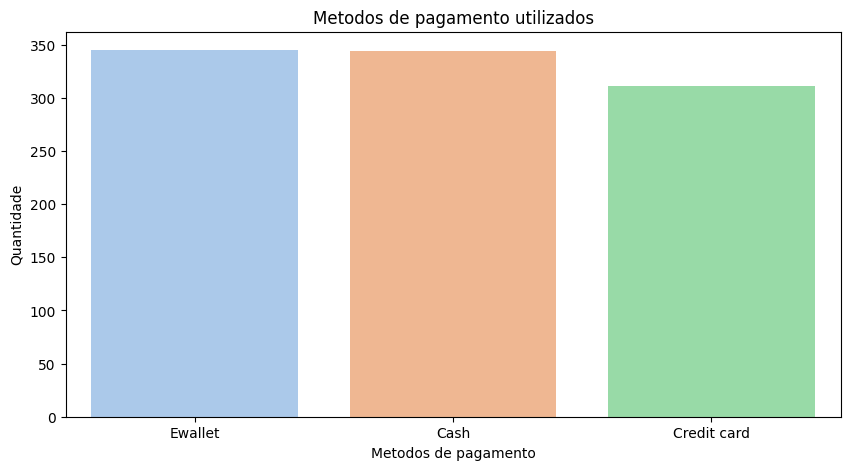

In [13]:
#Metodos de pagamento utilizados 

plt.figure(figsize=(10,5))
sns.countplot(x='Payment', data=dados, palette='pastel')
plt.xlabel('Metodos de pagamento')
plt.ylabel('Quantidade')
plt.title('Metodos de pagamento utilizados')

Text(0.5, 1.0, 'Metodos de pagamento em todas as filiais')

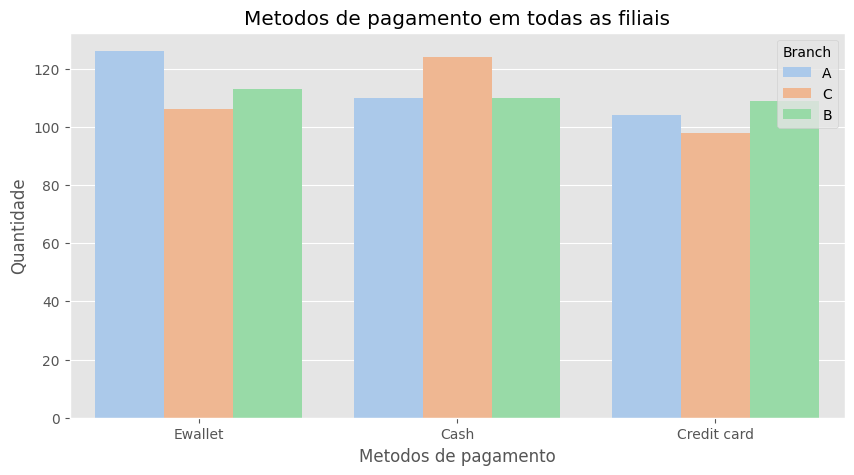

In [14]:
# Gráfico dos metodos de pagamento usados nas 3 filiais

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.countplot(x='Payment', hue = 'Branch', data=dados, palette='pastel')
plt.xlabel('Metodos de pagamento')
plt.ylabel('Quantidade')
plt.title('Metodos de pagamento em todas as filiais')

#### Em relação aos métodos de pagamento, a carteira eletrônica e o dinheiro foram as formas mais utilizadas entre as filiais. Ao analisar individualmente cada filial, observa-se que a carteira eletrônica é o método predominante na filial A, enquanto, na filial C, o dinheiro é a opção mais utilizada pelos clientes. O pagamento com cartão de crédito foi o menos utilizado nas filiais A e C, porém, na filial B, seu uso foi quase equivalente às demais formas de pagamento.

Text(0.5, 1.0, 'Distribuição e classificação nas 3 filiais')

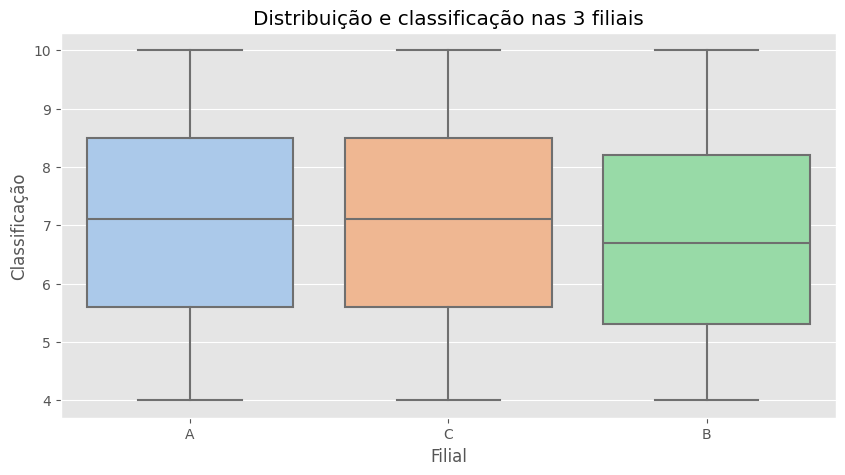

In [15]:
#Distribuição e classificação nas 3 filiais

plt.figure(figsize=(10,5))
sns.boxplot(x='Branch', y= 'Rating', data=dados, palette='pastel')
plt.xlabel('Filial')
plt.ylabel('Classificação')
plt.title('Distribuição e classificação nas 3 filiais')

##### A classificação média exibida nos boxplots das filiais A e C é superior a 7, enquanto a da filial B é inferior a 7. Esse resultado pode ser significativamente relevante para entender o desempenho das vendas em cada filial. Uma análise mais detalhada será realizada nas próximas etapas.

C:\Users\natys\AppData\Local\Temp\ipykernel_13700\3852135838.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Hour', y='Quantity', data=dados, palette='viridis')


Text(0, 0.5, 'Frequência de Vendas')

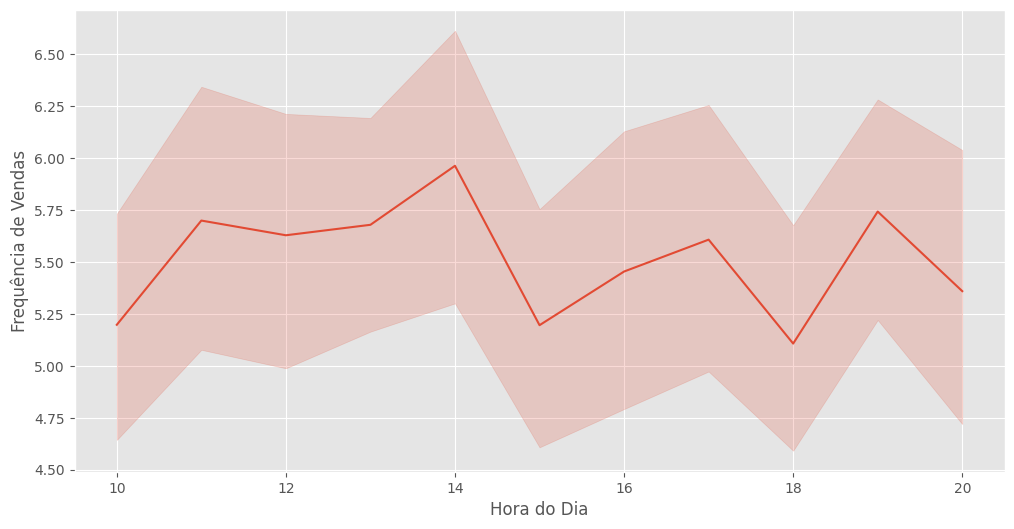

In [19]:
#Tempo máximo de vendas
dados["Time"]= pd.to_datetime(dados["Time"])
dados['Hour'] = dados['Time'].dt.hour

plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
sns.lineplot(x='Hour', y='Quantity', data=dados, palette='viridis')
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Frequência de Vendas', fontsize=12)

##### A análise do gráfico indica que o horário de maior frequência de vendas entre as filiais ocorre às 14:00.

Text(0.5, 1.0, 'Média de vendas de diferentes linhas de produtos')

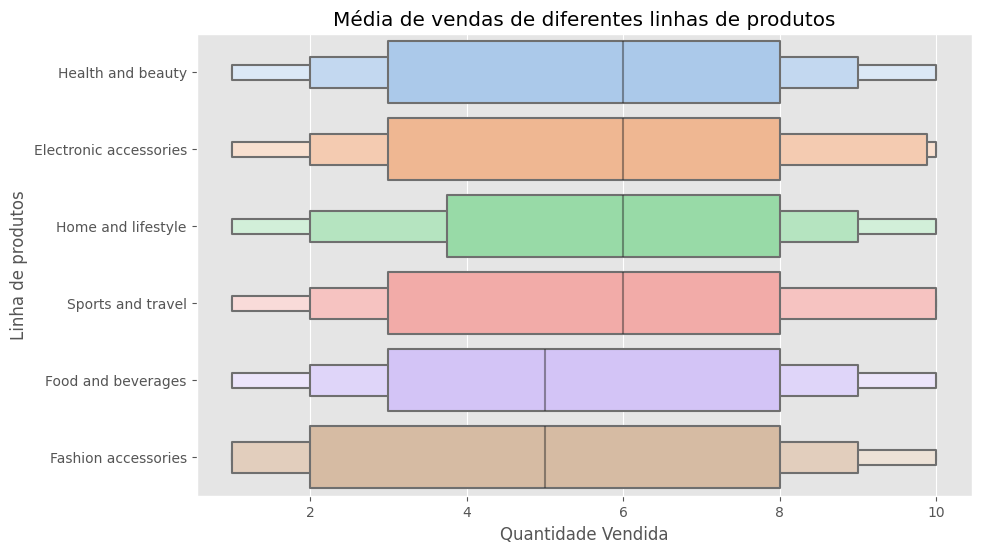

In [20]:
# Média de vendas de diferentes linhas de produtos

plt.figure(figsize=(10,6))
sns.boxenplot(x='Quantity', y='Product line', data=dados, palette='pastel')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Linha de produtos')
plt.title('Média de vendas de diferentes linhas de produtos')

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200')])

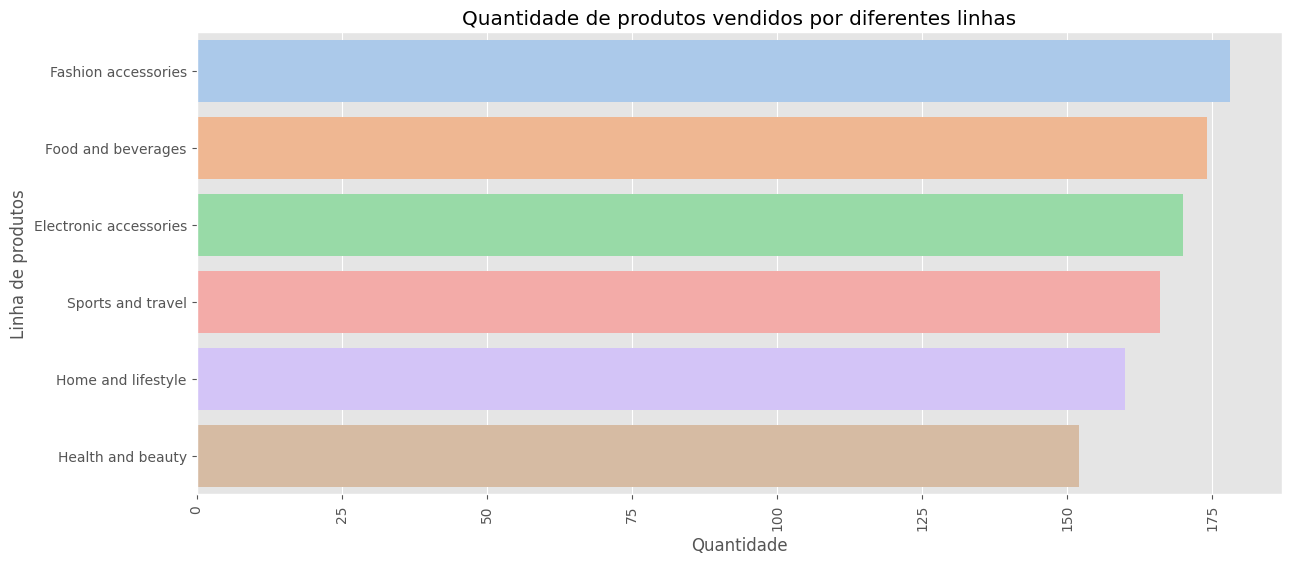

In [21]:
# Quantidade de produtos vendidos por diferentes linhas

plt.figure(figsize=(14,6))
sns.countplot( y='Product line', data=dados, order= dados['Product line'].value_counts().index, palette='pastel')
plt.xlabel('Quantidade')
plt.ylabel('Linha de produtos')
plt.title('Quantidade de produtos vendidos por diferentes linhas')
plt.xticks(rotation=90)

##### A análise dos gráficos revela que os produtos da linha Acessórios Fashion são os mais vendidos entre as filiais, seguidos pela categoria de Comidas e Bebidas, que ocupa a segunda posição em volume de vendas.

## **Análise de vendas por localização**

In [22]:
#Verificando quais as cidades tem filiais do supermercado
print(dados['City'].unique())

['Yangon' 'Naypyitaw' 'Mandalay']


In [23]:
# Quais as cidades geram maior receita para o grupo dono das filiais
city_total = dados.groupby('City')['Total'].sum().sort_values(ascending=False)
round (city_total, 2)

City
Naypyitaw    110568.71
Yangon       106200.37
Mandalay     106197.67
Name: Total, dtype: float64

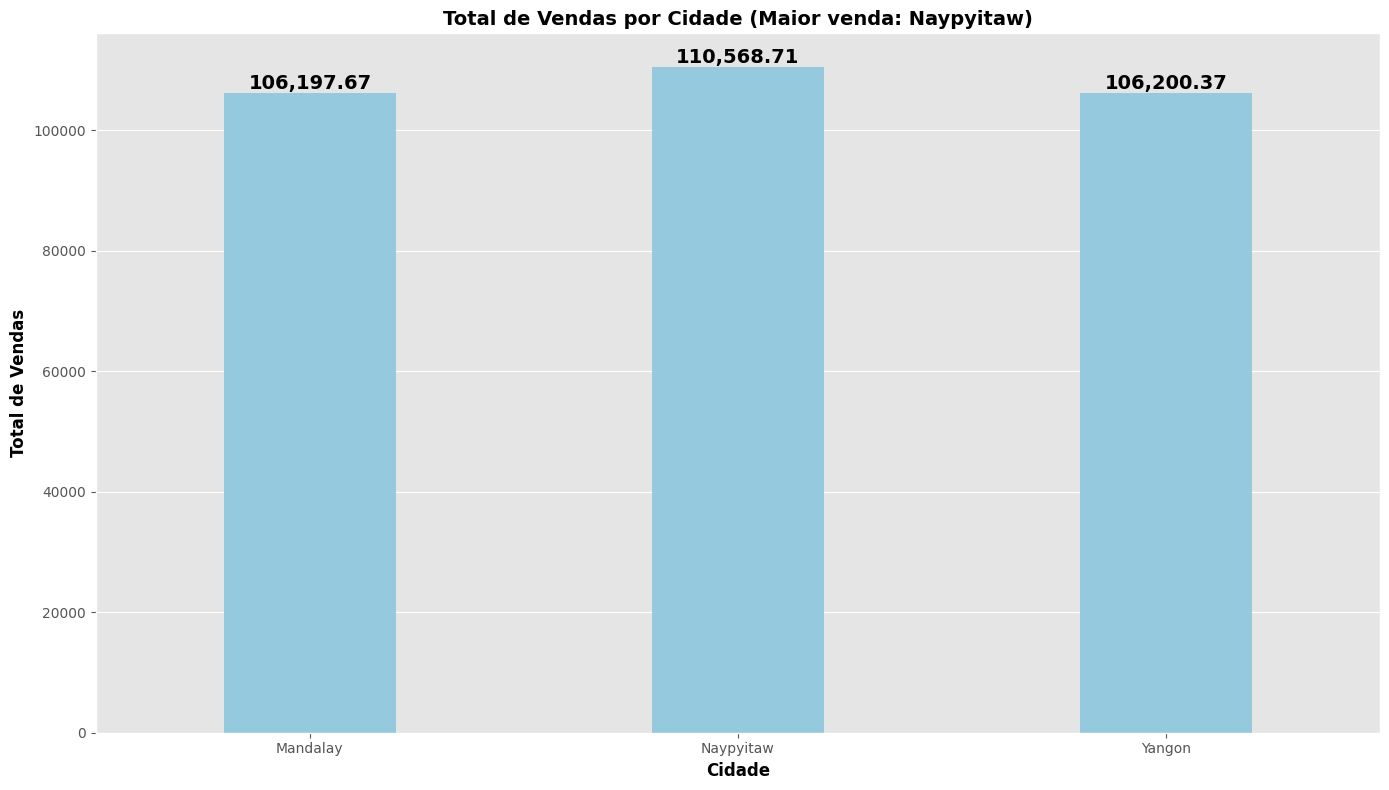

In [35]:
#Verificando visualmente qual cidade tem a filial que gera maior receita
city_total = dados.groupby('City')['Total'].sum()
max_total_city = city_total.idxmax()

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=city_total.index, y=city_total.values, width=0.4, color='skyblue')

for p in ax.patches:
  ax.annotate(f'{p.get_height():,.2f}',
              (p.get_x()+ p.get_width()/2, p.get_height()),
              ha='center', va='bottom', fontsize=14, color='black',
              fontweight='bold')

plt.xlabel('Cidade', fontsize=12, color='black', fontweight='bold')
plt.ylabel('Total de Vendas', fontsize=12, color='black', fontweight='bold')
plt.title(f'Total de Vendas por Cidade (Maior venda: {max_total_city})', fontsize=14, color='black', fontweight='bold')
plt.tight_layout()
plt.show()

##### A análise do gráfico demonstra que a filial localizada em Naypyitaw é a que gera a maior receita entre as cidades, totalizando 110.568,71. Em seguida, encontram-se as filiais de Yangon e Mandalay, com receitas de 106.200,37 e 106.197,67, respectivamente. A diferença entre Yangon e Mandalay é mínima, indicando um desempenho similar em termos de faturamento. No entanto, a filial de Naypyitaw se destaca como a mais lucrativa.

### *Existe diferença significativa entre as vendas nas filiais?*

Para avaliar a diferença significativa entre as vendas das filiais será necessário executar uma função estatística. Será executado o teste de hipótese ANOVA, levando em consideração:

H0: Não há diferença significativa entre as médias de vendas das filiais.

H1: Há diferença significativa entre as médidas de vendas das filiais. 

In [36]:
from scipy.stats import f_oneway

In [37]:
# Separando os dados de vendas por filiais 
vendas_a = dados[dados['Branch'] == 'A']['Total']
vendas_b = dados[dados['Branch'] == 'B']['Total']
vendas_c = dados[dados['Branch'] == 'C']['Total']

O ANOVA unidirecional testa a hipótese nula de que dois ou mais grupos têm a mesma média populacional. O teste é aplicado a amostras de dois ou mais grupos, possivelmente com tamanhos diferentes.

In [38]:
# Realizando o teste ANOVA
f_statistic, p_value = f_oneway(vendas_a, vendas_b, vendas_c)
print(f"Estatística F:{f_statistic}")
print(f"Valor-p: {p_value}")

alpha = 0.05 #Nível de significância

if p_value < alpha:
    print("Rejeitamos a hipotese nula, existe uma diferença significativa entre as médias de vendas das filiais.")
else:
    print("Não rejeitamos a hipotese nula, não há uma diferença significativa entre as médias de vendas das filiais.")

Estatística F:0.8845828327760512
Valor-p: 0.413210174367147
Não rejeitamos a hipotese nula, não há uma diferença significativa entre as médias de vendas das filiais.


##### Como o valor-p é maior que o nível de significância adotado (α = 0.05), não rejeitamos a hipótese nula, indicando que não há diferença estatisticamente significativa entre as médias de vendas das filiais. Isso sugere que, embora os valores absolutos de faturamento possam variar entre as unidades, essas variações não são estatisticamente relevantes.

## **Análise temporal**

In [39]:
# Quais são os dias com maior e menor volume de vendas?

venda_city_data = dados.groupby(['City', 'Date'])['Total'].sum().reset_index()
dia_maior_venda = venda_city_data.loc[venda_city_data.groupby('City')['Total'].idxmax()]
dia_menor_venda = venda_city_data.loc[venda_city_data.groupby('City')['Total'].idxmin()]

In [40]:
dia_maior_venda

,City,Date,Total
67,Mandalay,3/2/2019,3572.2575
101,Naypyitaw,1/23/2019,3632.8740
184,Yangon,1/19/2019,3254.4855


In [41]:
dia_menor_venda

,City,Date,Total
37,Mandalay,2/18/2019,30.9960
170,Naypyitaw,3/6/2019,38.8500
223,Yangon,2/26/2019,156.1035


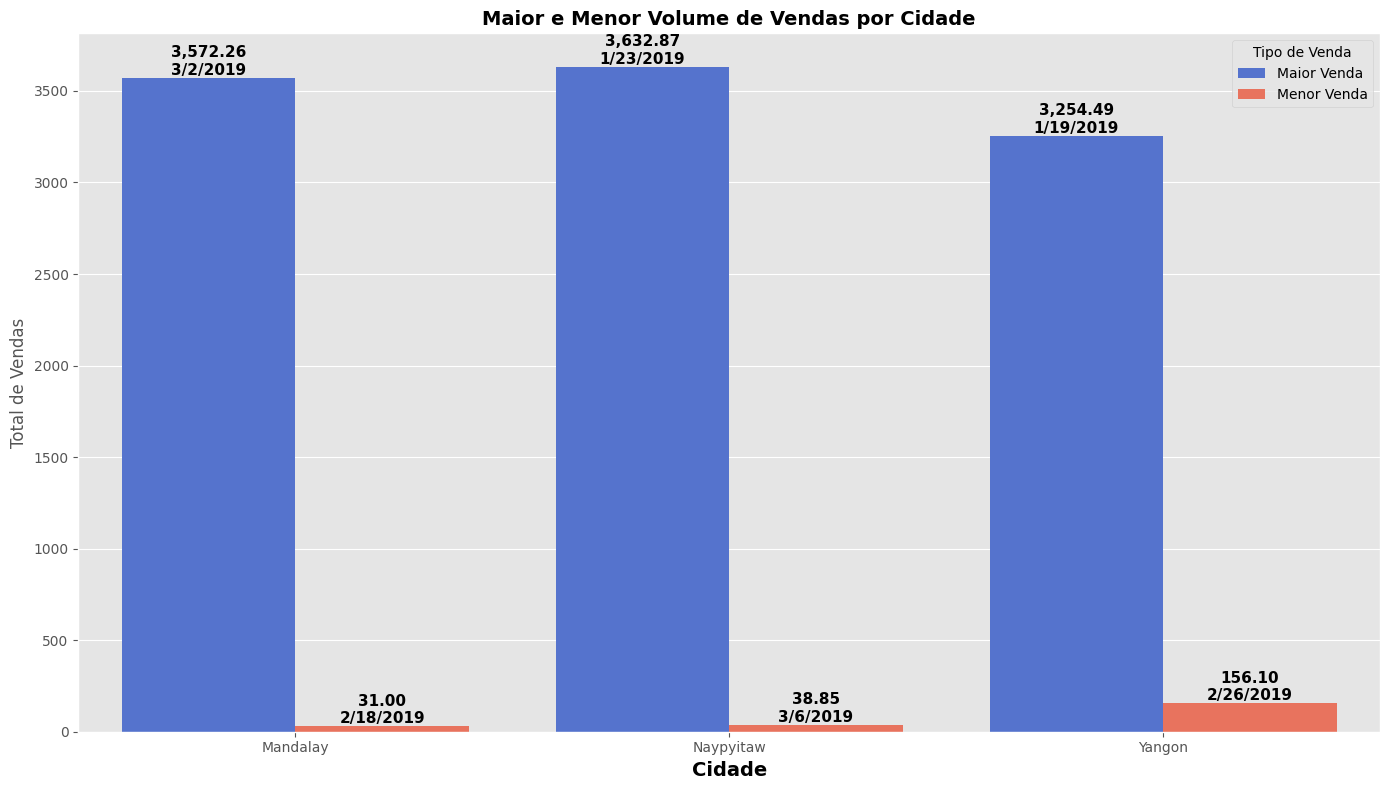

In [42]:
# Agrupando resultados de maior e menor venda em um unico gráfico 

# Dataframe combinado

dias_vendas = pd.concat([
    dia_maior_venda.assign(Tipo='Maior Venda'),
    dia_menor_venda.assign(Tipo='Menor Venda')
])

#Criando gráfico

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='City', y='Total', hue='Tipo', data=dias_vendas, palette=['royalblue', 'tomato'])

for p, date in zip(ax.patches, dias_vendas['Date']):
    ax.annotate(f'{p.get_height():,.2f}\n{date}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

plt.xlabel('Cidade', fontsize= 14, color='black', fontweight='bold')
plt.ylabel('Total de Vendas')
plt.title('Maior e Menor Volume de Vendas por Cidade', fontsize= 14, color='black', fontweight='bold')
plt.legend(title='Tipo de Venda')
plt.tight_layout()
plt.show()    

In [43]:
# Produto mais vendido nos dias de maior venda em cada filial

maior_venda = dados.merge(dia_maior_venda[['City','Date']], on=['City','Date'])

produto_mais_vendido = (
    maior_venda.groupby(['City', 'Product line'])['Quantity'].sum()
    .reset_index()
    .sort_values(['City', 'Quantity'], ascending=[True, False])
    .drop_duplicates(subset=['City'])
)

print(produto_mais_vendido)

         City        Product line  Quantity
2    Mandalay  Home and lifestyle        28
6   Naypyitaw  Food and beverages        16
13     Yangon  Home and lifestyle        19


#### A análise temporal permitiu identificar os dias com maior e menor volume de vendas em cada cidade. Os dias de maior venda foram:
    Mandalay: 03/02/2019
    Naypyitaw: 23/01/2019
    Yangon: 19/01/2019
#### Enquanto os dias de menor venda foram:
    Mandalay: 18/02/2019
    Naypyitaw: 06/03/2019
    Yangon: 26/02/2019
    
##### Além disso, nos dias de maior venda, os produtos mais vendidos foram casa e estilo de vida em Mandalay e Yangon, e alimentos e bebidas em Naypyitaw. Os resultados indicam possíveis padrões sazonais nas vendas, podendo auxiliar na definição de estratégias comerciais mais eficazes.

## Análise de desempenho por gênero

In [44]:
# Categorias mais consumidas por gênero?

produto_genero = dados.groupby(['Gender', 'Product line'])['Invoice ID'].count().reset_index()

produtos_vendidos_genero = produto_genero.pivot(index='Product line', columns='Gender', values='Invoice ID').fillna(0)

produtos_vendidos_genero['Diferença (%)'] = ((produtos_vendidos_genero['Male'] - produtos_vendidos_genero['Female'])
                                            / produtos_vendidos_genero['Female'])*100

produtos_vendidos_genero

Gender,Female,Male,Diferença (%)
Product line,,,
Electronic accessories,84,86,2.380952
Fashion accessories,96,82,-14.583333
Food and beverages,90,84,-6.666667
Health and beauty,64,88,37.500000
Home and lifestyle,79,81,2.531646
Sports and travel,88,78,-11.363636


#### Possivel observar através dessa comparação que mulheres tendem a comprar nos supermercados produtos da linha acessorios fashion, enquanto os homens tendem a comprar mais produtos de saúde e beleza. 

In [45]:
# Qual o ticket médio por gênero?

ticket_medio_genero = dados.groupby('Gender')['Total'].mean()

ticket_medio_genero

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

##### A análise de desempenho por gênero revelou diferenças interessantes no comportamento de compra. Ao comparar a quantidade de produtos vendidos por gênero, observou-se que as mulheres tendem a consumir mais produtos da linha de acessórios fashion, enquanto os homens demonstram maior interesse por itens de saúde e beleza. Essa variação foi evidenciada pela diferença percentual nas vendas, com destaque para uma maior procura masculina por produtos de saúde e beleza (37,5%).

##### Quanto ao ticket médio, as mulheres apresentaram um valor médio de 335.10, ligeiramente superior ao dos homens, que ficou em 310.79. Esses dados indicam que, embora os homens prefiram certos tipos de produtos, as mulheres realizam compras de maior valor médio no geral.